<a href="https://colab.research.google.com/github/mohammedirfan78698/PDS_B15_1997_/blob/main/project_1997_b15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("Finance_data.csv")

df["gender"] = LabelEncoder().fit_transform(df["gender"])
df["Investment_Avenues"] = LabelEncoder().fit_transform(df["Investment_Avenues"])
df["Objective"] = LabelEncoder().fit_transform(df["Objective"])
df["Purpose"] = LabelEncoder().fit_transform(df["Purpose"])
df["Duration"] = LabelEncoder().fit_transform(df["Duration"])
df["Invest_Monitor"] = LabelEncoder().fit_transform(df["Invest_Monitor"])
df["Expect"] = LabelEncoder().fit_transform(df["Expect"])
df["Avenue"] = LabelEncoder().fit_transform(df["Avenue"])
df["Source"] = LabelEncoder().fit_transform(df["Source"])

X = df[["gender","age","Mutual_Funds","Equity_Market","Debentures","Government_Bonds","Fixed_Deposits","PPF","Gold"]]
y = df["Avenue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         3
           2       0.25      0.33      0.29         3
           3       0.00      0.00      0.00         1

    accuracy                           0.12         8
   macro avg       0.06      0.08      0.07         8
weighted avg       0.09      0.12      0.11         8

Confusion Matrix:
 [[0 1 0 0]
 [1 0 2 0]
 [2 0 1 0]
 [0 0 1 0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

importances = rf.feature_importances_
feature_names = X.columns

for name, score in zip(feature_names, importances):
    print(f"{name}: {score:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.33      0.50         3
           2       0.50      1.00      0.67         3
           3       0.00      0.00      0.00         1

    accuracy                           0.62         8
   macro avg       0.62      0.58      0.54         8
weighted avg       0.69      0.62      0.56         8

Confusion Matrix:
 [[1 0 0 0]
 [0 1 2 0]
 [0 0 3 0]
 [0 0 1 0]]
gender: 0.0753
age: 0.2191
Mutual_Funds: 0.1156
Equity_Market: 0.1046
Debentures: 0.0735
Government_Bonds: 0.1131
Fixed_Deposits: 0.1147
PPF: 0.0953
Gold: 0.0888


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df["gender"], df["Investment_Avenues"])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results")
print("Chi2 Value:", chi2)
print("p-value:", p)
if p < 0.05:
    print("Significant association between gender and investment avenues")
else:
    print("No significant association")


Chi-Square Test Results
Chi2 Value: 2.9069069069069067
p-value: 0.08820088356567414
No significant association


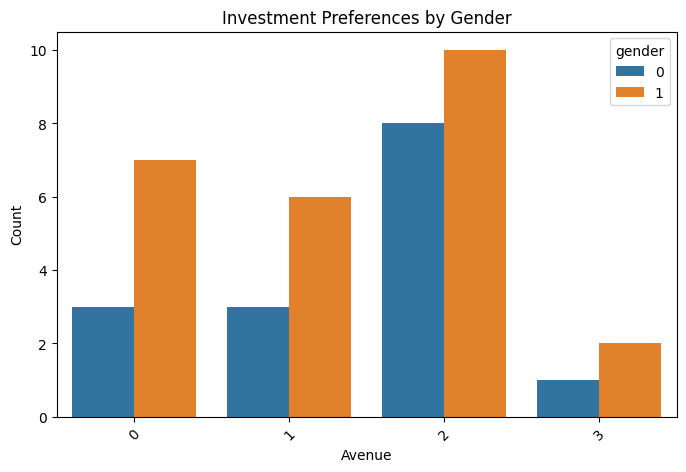

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

prefs = df.groupby(["gender","Avenue"]).size().reset_index(name="Count")

plt.figure(figsize=(8,5))
sns.barplot(x="Avenue", y="Count", hue="gender", data=prefs)
plt.title("Investment Preferences by Gender")
plt.xticks(rotation=45)
plt.show()


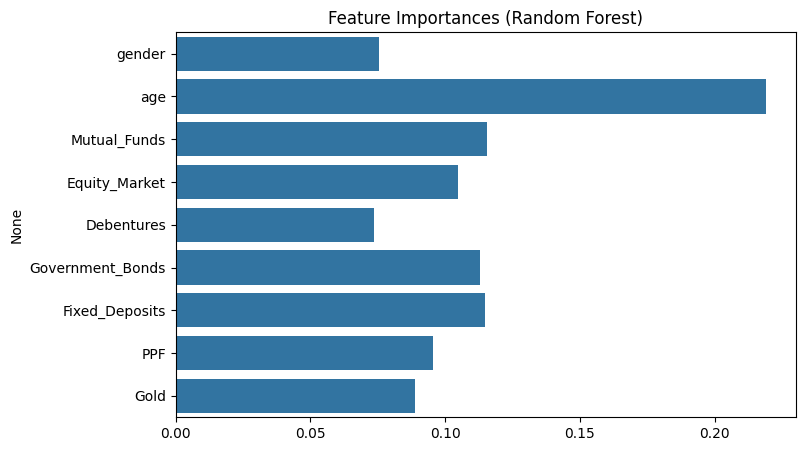

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances (Random Forest)")
plt.show()


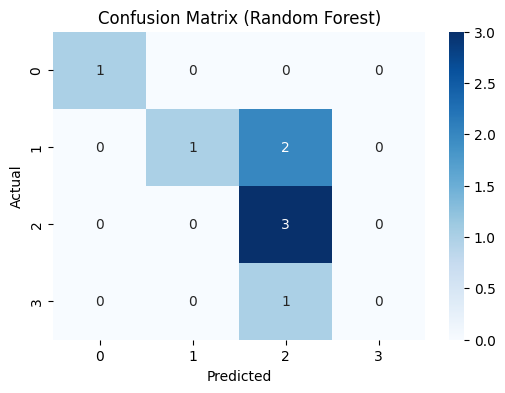

In [ ]:
import numpy as np
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
